<a href="https://colab.research.google.com/github/pricilakrepeki/Ciencia-de-dados-projetos/blob/master/projeto_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Processamento de Linguagem Natural
---
O que é NLP (ou PLN)?  
Como podemos fazer o computador extrair a semântica dos textos?  
Exemplos: Quando usamos o Google para pesquisas ou perguntamos pra Siri ou Cortana? O que acontece?  

Tarefas mais comuns de NLP:  
- Classificação de textos (tematização, triagem de solicitações (SF, ANAC), e-mail spam).  
- Análise de sentimentos (Satisfação clientes serviços ou produtos).  
- Geração de texto (teclado smartphones).  


referência: https://www.youtube.com/watch?v=xvqsFTUsOmc&t=7s


## Tokenization: processo de dividir um texto em palavras (tokens) separadas.  
'Fui para os bosques viver de livre vontade.'   
[ 'Fui', 'para', 'os', 'bosques', 'viver', 'de', 'livre', 'vontade', '.' ]  
  
### Numericalization: converter cada token em número.  
'Fui', 'para', 'os', 'bosques', 'viver', 'de', 'livre', 'vontade', '.'   
[ 0,1,2,3,4,5,6,7,8,9 ]  

### Stopwords :
Stop words (ou palavras de parada – tradução livre) são palavras que podem ser consideradas irrelevantes para o conjunto de resultados a ser exibido em uma busca realizada em uma search engine.   
Exemplos: as, e, os, de, dos, das, para, com, sem.  
  
### Stemming :
Stemming é basicamente remover o sufixo de uma palavra e reduzi-lo à sua raiz. O token resultante não precisa ser uma palavra válida.
  
### Lemmatization :
Lematização na lingüística é o processo de agrupar as formas flexionadas de uma palavra para que possam ser analisadas como um único item, identificado pelo lema da palavra ou forma de dicionário. O token final é uma palavra válida no dicionário.

---
### Bag of words (sklearn CountVectorizer)
---
Bag of words: converte cada token único em um número inteiro.  
**Problema**: Ordem das palavras não importa!  
  
“It was the best of times”  
“It was the worst of times”  
“It was the age of wisdom”  
“It was the age of foolishness”  
   
Vocabulário (dicionário): ‘It’, ‘was’, ‘the’, ‘best’, ‘of’, ‘times’, ‘worst’, ‘age’, ‘wisdom’, ‘foolishness’  
  
cria vetores para cada frase:  
“It was the best of times” = [1, 1, 1, 1, 1, 1, 0, 0, 0, 0]  
“It was the worst of times” = [1, 1, 1, 0, 1, 1, 1, 0, 0, 0]  
“It was the age of wisdom” = [1, 1, 1, 0, 1, 0, 0, 1, 1, 0]  
“It was the age of foolishness” = [1, 1, 1, 0, 1, 0, 0, 1, 0, 1]  
  
n-grams:  
gram: cada token é um 'gram':  
‘It’, ‘was’, ‘the’, ‘best’, ‘of’, ‘times’   
bigram : “it was”, “was the”, “the best”, “best of”, “of times”  
trigram : “It was the", "was the best", "the best of", "best of times"  

In [ ]:
# Bag of Words no sklearn: usamos CountVectorizer
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
# lista de documentos
text = ['O tempo é muito lento para os que esperam',
        'Muito rápido para os que têm medo',
        'Muito longo para os que lamentam',
        'Muito curto para os que festejam',
        'Mas, para os que amam e amam, o tempo é eterno.']
# instancia o transform CountVectorizer
vectorizer = CountVectorizer()
# tokeniza e cria o vocabulário
vectorizer.fit(text)
# mostra o vocabulário criado
print('Vocabulário: ')
print(vectorizer.vocabulary_)
# converte em números
print('\ndimensões da matrix: ')
vector = vectorizer.transform(text)
# # mostra as dimensões da matrix de frequência
print(vector.shape)
# # mostra os documentos codificados
# print(vector.toarray())
# mostra os documentos codificados
values = vectorizer.transform(text)
feature_names = vectorizer.get_feature_names()
print('\n',text[0],'\n',text[1],'\n',text[2],'\n',text[3],'\n',text[4],'\n')
pd.DataFrame(values.toarray(), columns = feature_names)

Vocabulário: 
{'tempo': 15, 'muito': 10, 'lento': 6, 'para': 12, 'os': 11, 'que': 13, 'esperam': 2, 'rápido': 14, 'têm': 16, 'medo': 9, 'longo': 7, 'lamentam': 5, 'curto': 1, 'festejam': 4, 'mas': 8, 'amam': 0, 'eterno': 3}

dimensões da matrix: 
(5, 17)

 O tempo é muito lento para os que esperam 
 Muito rápido para os que têm medo 
 Muito longo para os que lamentam 
 Muito curto para os que festejam 
 Mas, para os que amam e amam, o tempo é eterno. 



,amam,curto,esperam,eterno,festejam,lamentam,lento,longo,mas,medo,muito,os,para,que,rápido,tempo,têm
0,0,0,1,0,0,0,1,0,0,0,1,1,1,1,0,1,0
1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,1
2,0,0,0,0,0,1,0,1,0,0,1,1,1,1,0,0,0
3,0,1,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0
4,2,0,0,1,0,0,0,0,1,0,0,1,1,1,0,1,0


---
### TF-IDF Term frequency — Inverse document frequency
---

(sklearn: TfidfVectorizer)  
TF-IDF() é um método estatístico utilizado para avaliar a importância de uma palavra em determinado documento.  
  
TF - Frequência dos termos: fé a frequência que uma palavra aparece em um documento, divido pelo número total de palavras do documento.  
  
IDF - Frequência inversa de documentos: é a pontuação de quão interessante (rara) é a palavra no corpus. Reduz o peso das palavras que aparecem muito nos documentos.  
Sem entrar na matemática, TF-IDF são pontuações de frequência de palavras que tentam destacar palavras mais interessantes, freqüentes em um documento, mas raras entre outros documentos. Ou seja, diminui o peso das sentenças que ocorrem com mais frequência no conjunto de textos selecionados, ao mesmo tempo que aumenta o peso daqueles que ocorrem raramente.  


### Fórmula do TF-IDF
![](https://i.imgur.com/oc2kgfO.jpg)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# instancia o transform CountVectorizer
tfidf_vectorizer = TfidfVectorizer()
# tokeniza e cria o vocabulário
tfidf_vectorizer.fit(text)
# mostra o vocabulário criado
print('Vocabulário: ')
print(tfidf_vectorizer.vocabulary_)
print('\nPeso de cada palavra do vocabulário: ')
print(tfidf_vectorizer.idf_)
# encode document
tfidf_vector = tfidf_vectorizer.transform(text)
# mostra as dimensões da matrix de frequência
print('\nDimensões da matrix: ')
print(tfidf_vector.shape)
# mostra os documentos codificados
val = tfidf_vectorizer.fit_transform(text)
feature_names = tfidf_vectorizer.get_feature_names()
print('\n',text[0],'\n',text[1],'\n',text[2],'\n',text[3],'\n',text[4],'\n')
pd.DataFrame(val.toarray(), columns = feature_names)
# print(tfidf_vector.toarray())

NameError: ignored

---
# Classificador de Jurisprudências do TCU
---
  
![](https://i.imgur.com/dXR8RAf.png )
Fonte dos dados: https://pesquisa.apps.tcu.gov.br/#/pesquisa/jurisprudencia-selecionada  
Pesquisa Jurisprudência Selecionada   
Pesquisa por árvore de classificação  
Classificar jurisprudência por 'Área' (As quatro áreas mais comuns).  
CLASSES = ['Pessoal',  'Licitação',  'Responsabilidade', 'Direito_Processual']

Fernando Melo  
22-07-2020


In [ ]:
%matplotlib inline

# # Importar bibliotecas
from pprint import pprint
from time import time
import logging
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

print(__doc__)
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,format='%(asctime)s %(levelname)s %(message)s')

Automatically created module for IPython interactive environment


In [ ]:
# Salvando o modelo para posterior reuso
# from sklearn.externals import joblib
from joblib import dump, load
# import re

In [ ]:
# Fazendo o download das Jurisprudências do TCU
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Rf4cXGDZvx3q5wKrSy1V82gzsZVrGWAm' -O tcu_jurisp_redz_v1.csv

--2020-10-15 18:53:46--  https://docs.google.com/uc?export=download&id=1Rf4cXGDZvx3q5wKrSy1V82gzsZVrGWAm
Resolving docs.google.com (docs.google.com)... 64.233.188.138, 64.233.188.101, 64.233.188.113, ...
Connecting to docs.google.com (docs.google.com)|64.233.188.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-1o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/10vef4t7eddbi9emptqasg2q9o9e8npe/1602788025000/00852059889916176922/*/1Rf4cXGDZvx3q5wKrSy1V82gzsZVrGWAm?e=download [following]
--2020-10-15 18:53:48--  https://doc-14-1o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/10vef4t7eddbi9emptqasg2q9o9e8npe/1602788025000/00852059889916176922/*/1Rf4cXGDZvx3q5wKrSy1V82gzsZVrGWAm?e=download
Resolving doc-14-1o-docs.googleusercontent.com (doc-14-1o-docs.googleusercontent.com)... 108.177.97.132, 2404:6800:4008:c04::84
Connecting to doc-14-1o-docs.googleusercontent.com (doc-14-1o-d

In [ ]:
# Carrega os dados de jurisprudência do TCU
df_tcu = pd.read_csv('tcu_jurisp_redz_v1.csv')
df_tcu.columns = ['classe','texto']

In [ ]:
print(df_tcu.shape)
df_tcu.head()

(10263, 2)


,classe,texto
0,3,A medida cautelar do TCU que determina a suspe...
1,3,A retenção de recursos pela Administração com ...
2,3,Para fins de admissibilidade de recurso de rev...
3,3,"Fotografias não têm pleno valor probatório, so..."
4,3,Não cabe instauração de tomada de contas espec...


In [ ]:
df_tcu.texto[1]

'A retenção de recursos pela Administração com vistas ao ressarcimento do prejuízo ou a existência de ação judicial para o reconhecimento do dano ao erário não constituem óbices ao prosseguimento da tomada de contas especial no TCU. Ocorrendo ressarcimento em uma instância, basta que o responsável apresente essa comprovação perante o juízo de execução para evitar o duplo pagamento.</p><p><b>Enunciado </b>'

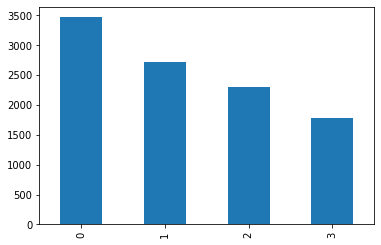

In [ ]:
df_tcu.classe.value_counts().plot(kind='bar')

In [ ]:
# Separa os dados de treino e teste (proporção 80/20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_tcu.texto, df_tcu.classe, test_size=0.2,
                                                    stratify=df_tcu.classe,random_state=42)

In [ ]:
X_train[:10]

3965    Não se pode exigir como condição de habilitaçã...
1976    A Administração, em respeito à transparência e...
1253    O encaminhamento de representação ao TCU, sem ...
4818    Havendo alteração nos pressupostos de fato que...
2126    No pregão, o exame do registro da intenção de ...
3107    No gerenciamento de ata de registro de preços,...
3739    É inconstitucional o Decreto 2.745/1998 e o ar...
1989    As entidades do Sistema S não se sujeitam à es...
9522    A atuação de gestor com base em parecer técnic...
7262    Há impossibilidade da percepção de anuênios pe...
Name: texto, dtype: object

In [ ]:
# Confere a proporção das classes nos dados de treino e de teste
print('TREINO : ',y_train.shape,'\n', y_train.value_counts(normalize=True),'\n')
print('TESTE  : ',y_test.shape,'\n', y_test.value_counts(normalize=True))

TREINO :  (8210,) 
 0    0.337881
1    0.265286
2    0.223873
3    0.172960
Name: classe, dtype: float64 

TESTE  :  (2053,) 
 0    0.338042
1    0.265465
2    0.223575
3    0.172918
Name: classe, dtype: float64


In [ ]:
# instancia o transform CountVectorizer
tfidf_vectorizer = TfidfVectorizer()
# # tokeniza e cria o vocabulário
tfidf_vectorizer.fit(X_train)
# # mostra o vocabulário criado
print('Vocabulário: ')
print(tfidf_vectorizer.vocabulary_)

# encode document
tfidf_vector = tfidf_vectorizer.transform(X_train)
# mostra as dimensões da matrix de frequência
print('\nDimensões da matrix: ')
print(tfidf_vector.shape)


Vocabulário: 
{'não': 8154, 'se': 10698, 'pode': 8935, 'exigir': 5338, 'como': 2536, 'condição': 2797, 'de': 3548, 'habilitação': 6136, 'licitante': 7450, 'pagamento': 8533, 'valor': 11768, 'superior': 11177, 'ao': 1366, 'custo': 3507, 'efetivo': 4540, 'reprodução': 10268, 'gráfica': 6111, 'do': 4418, 'edital': 4516, 'sob': 10910, 'pena': 8712, 'enriquecimento': 4800, 'ilícito': 6292, 'da': 3522, 'administração': 932, 'contratante': 3201, 'em': 4622, 'respeito': 10370, 'transparência': 11576, 'motivação': 7919, 'dos': 4448, 'atos': 1768, 'administrativos': 931, 'deve': 4125, 'explicitar': 5399, 'as': 1609, 'razões': 9776, 'para': 8547, 'admissão': 936, 'ou': 8497, 'vedação': 11803, 'participação': 8602, 'consórcios': 3085, 'empresas': 4703, 'quando': 9691, 'contratação': 3206, 'objetos': 8185, 'maior': 7601, 'vulto': 12006, 'complexidade': 2601, 'encaminhamento': 4719, 'representação': 10260, 'tcu': 11319, 'sem': 10753, 'que': 9717, 'órgão': 12078, 'fiscalizado': 5707, 'tenha': 11367, 

## Treina o classificador

In [ ]:
# Define o pipeline incluindo o extrator de 'features do texto e um classificador

pipeline = Pipeline([
    ('vect', CountVectorizer(max_df=1.0, max_features=50000,ngram_range=(1,2))),
    ('tfidf', TfidfTransformer(use_idf=True,norm='l2')),
    ('clf', SGDClassifier(loss='log',alpha=1e-06, penalty='elasticnet', max_iter=60)), # default hinge. to get proba=log or modified_huber
])

In [ ]:
%%time
# Treine o modelo(fit)
classificador = pipeline.fit(X_train, y_train)

CPU times: user 1.56 s, sys: 411 ms, total: 1.97 s
Wall time: 1.57 s


In [ ]:
 # Faça a predição nos dados de teste
 predicted = classificador.predict(X_test)

In [ ]:
# Mostra a acurácia do modelo nos dados de teste
classificador.score(X_test,y_test)

0.9581100828056502

In [ ]:
# Mostra o f1 score do modelo nos dados de teste (usado quando as classes estão desbalanceadas)
from sklearn.metrics import f1_score
f1_score(y_test, predicted, average='weighted')

0.9580595286713911

In [ ]:
# avalie o modelo usando 'claasification_report' do sklearn
from sklearn import metrics
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       694
           1       0.96      0.99      0.97       545
           2       0.95      0.92      0.93       459
           3       0.93      0.93      0.93       355

    accuracy                           0.96      2053
   macro avg       0.95      0.95      0.95      2053
weighted avg       0.96      0.96      0.96      2053



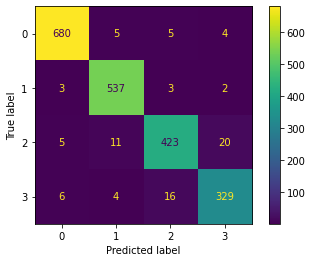

In [ ]:
# mostrar a matrix de confusão do modelo sobre todo o dataset
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classificador, X_test, y_test, values_format='d')

In [ ]:
# Mostra os hiperparâmetros usados para treinar o modelo
classificador.get_params

<bound method Pipeline.get_params of Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=50000, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=No...
                 SGDClassifier(alpha=1e-06, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='log', max_iter=60

---
## Grid_Search - escolha dos melhores parâmetros de treinamento
---

In [ ]:
# GERA LISTAS COM DADOS DE TREINO E TESTE PARA GRID_SEARCH
# Cria lista contendo todos as jurisprudências
text_train = list(X_train)
text_test = list(X_test)
text_train[:5]

['Não se pode exigir como condição de habilitação de licitante o pagamento de valor superior ao custo efetivo de reprodução gráfica do edital, sob pena de enriquecimento ilícito da Administração contratante.',
 'A Administração, em respeito à transparência e à motivação dos atos administrativos, deve explicitar as razões para a admissão ou vedação à participação de consórcios de empresas quando da contratação de objetos de maior vulto e complexidade.',
 'O encaminhamento de representação ao TCU, sem que o órgão fiscalizado tenha oportunidade de se manifestar, caracteriza <i>erro in procedendo</i>, prejudicando o mérito da decisão.',
 'Havendo alteração nos pressupostos de fato que fundamentaram decisão judicial transitada em julgado que reconheceu a servidor o direito a determinado acréscimo remuneratório, a eficácia do julgado cessa de imediato, independentemente de ação rescisória.',
 'No pregão, o exame do registro da intenção de recurso deve limitar-se à verificação dos requisitos 

In [ ]:
# Cria lista contendo todos os labels (rótulos das classes) das jurisprudências
target_train = list(y_train)
target_test = list(y_test)
print(target_test[:5])

[3, 3, 0, 2, 0]


In [ ]:
# Define Pipeline (pode-se passar alguns parâmetros estáticos)
pipeline = Pipeline([
    ('vect', CountVectorizer(max_df=1.0, max_features=50000,ngram_range=(1,2))),
    ('tfidf', TfidfTransformer(use_idf=True,norm='l2')),
    ('clf', SGDClassifier(loss='log',alpha=1e-06, penalty='elasticnet')), # default hinge. to get proba=log or modified_huber
])

In [ ]:
# Define os parâmetros para o grid_search
parameters = {
    # 'clf__alpha': (1e-06,), # constante que multiplica o termo de regularização. Quanto maior, mais forte a regularização.
    'clf__max_iter': (60,65), # número máximo de épocas(passagem por todos os dados de treinamento)
    # 'clf__penalty:': ('l2','elasticnet'), # A penalização (termo de regularização). 'l1', 'l2' ou 'elasticnet' (uma combinação de l1 e l2)
    # 'tfidf__norm:': ('l2'),
    # 'tfidf__use_idf:': [True],
    # 'vect__max_df:': [1.0],
    # 'vect__max_features:': [50000],
    # 'vect__ngram_range:': [(1, 2)]
    }

In [ ]:
if __name__ == "__main__":
    # multiprocessing requires the fork to happen in a __main__ protected
    # block

    # Encontra os melhores parâmetros (CV de 3 folds, )
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1,cv=3)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()

    grid_search.fit(text_train, target_train)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'clf__max_iter': (60, 65)}
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    5.9s finished


done in 7.336s

Best score: 0.948
Best parameters set:
	clf__max_iter: 60


In [ ]:
# Faz a predição das classes nos dados de teste (primeiras 5 jurisprudências)
grid_search.best_estimator_.predict(text_test)[0:5]

array([3, 3, 0, 2, 0])

In [ ]:
# Mostra as probabilidades das classes nos dados de teste (primeiras 5 jurisprudências)
prob_preds= grid_search.best_estimator_.predict_proba(text_test)
prob_preds[:5]

array([[1.22584605e-05, 2.73606011e-05, 6.40269257e-03, 9.93557688e-01],
       [6.27710874e-02, 1.02125756e-03, 1.91945550e-02, 9.17013100e-01],
       [9.90760538e-01, 2.61672204e-03, 3.43799943e-03, 3.18474061e-03],
       [1.29640351e-04, 1.37695280e-03, 9.91530069e-01, 6.96333781e-03],
       [9.96271351e-01, 3.67100474e-03, 2.78105664e-05, 2.98340999e-05]])

In [ ]:
p = grid_search.best_estimator_.predict(text_test)
y = target_test

In [ ]:
from sklearn.metrics import f1_score
f1_score(y, p, average='weighted')

0.9526462523379912

In [ ]:
cls_grid_best = grid_search.best_estimator_.fit(text_train,target_train)

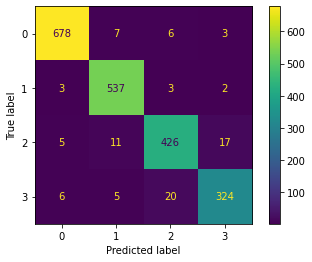

In [ ]:
plot_confusion_matrix(cls_grid_best, text_test, target_test , values_format='d')

---
## Curso Machine Learning em Projetos
---
Outras técnicas e dicas de NLP com Sklearn:  
- Como criar Modelos de Análise de Sentimento.
- Pipeline em detalhes.
- Grid_search em detalhes.
- Gerar tabela de conferência com o grau de confiança das predições do modelo.
- Como salvar o modelo classificador para colocar em produção.
- Interpretação dos modelos.



---
## Curso Machine Learning em Projetos  
---
Tudo isso e muito mais você poderá aprofundar até dominar essas técnicas conosco em um curso de 30h em 10 encontros em novembro! Veja os detalhes em: https://bit.ly/MLprojetos


### FIM